In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import matplotlib.pyplot as plt



In [5]:
data=pd.read_csv("Sales_LinReg.csv")

In [6]:
data.shape

(305, 6)

In [8]:
data.head()

,Republic,NDTV,TV5,TV9,AajTak,sales
0,8.7,48.9,4.0,75.0,49.0,7.2
1,57.5,32.8,65.9,23.5,57.5,11.8
2,120.2,19.6,7.2,11.6,18.5,13.2
3,8.6,2.1,46.0,1.0,2.6,4.8
4,199.8,2.6,52.9,21.2,2.9,10.6


In [9]:
data.tail()

,Republic,NDTV,TV5,TV9,AajTak,sales
300,286.0,13.9,35.2,3.7,13.9,15.9
301,18.7,12.1,23.7,23.4,18.7,6.7
302,39.5,41.1,17.6,5.8,39.5,10.8
303,75.5,10.8,8.3,6.0,75.5,9.9
304,17.2,4.1,30.0,31.6,17.2,5.9


In [11]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Republic  295 non-null    float64
 1   NDTV      300 non-null    float64
 2   TV5       305 non-null    float64
 3   TV9       297 non-null    float64
 4   AajTak    300 non-null    float64
 5   sales     305 non-null    float64
dtypes: float64(6)
memory usage: 14.4 KB


In [12]:
data.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,295.000000,300.000000,305.000000,297.000000,300.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,23.517967,13.811475
std,87.330161,14.781927,20.290023,21.411180,15.853789,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,74.050000,9.125000,15.900000,10.900000,10.000000,10.300000
50%,149.800000,21.050000,26.200000,23.500000,21.300000,12.800000
75%,221.450000,35.650000,39.600000,43.000000,36.900000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


**imputing the null values **


In [14]:
for column_name in data.columns:

  median_value = data[column_name].median()
  data[column_name].fillna(median_value, inplace=True)


In [16]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Republic  305 non-null    float64
 1   NDTV      305 non-null    float64
 2   TV5       305 non-null    float64
 3   TV9       305 non-null    float64
 4   AajTak    305 non-null    float64
 5   sales     305 non-null    float64
dtypes: float64(6)
memory usage: 14.4 KB


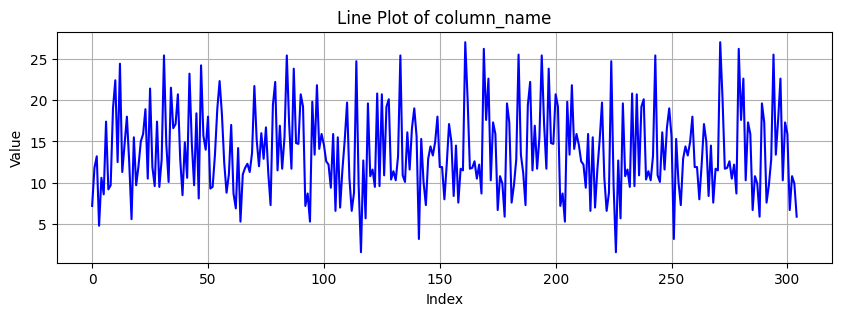

<ipython-input-19-9c703ebf4bc0>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(column_data, shade=True, color='green')


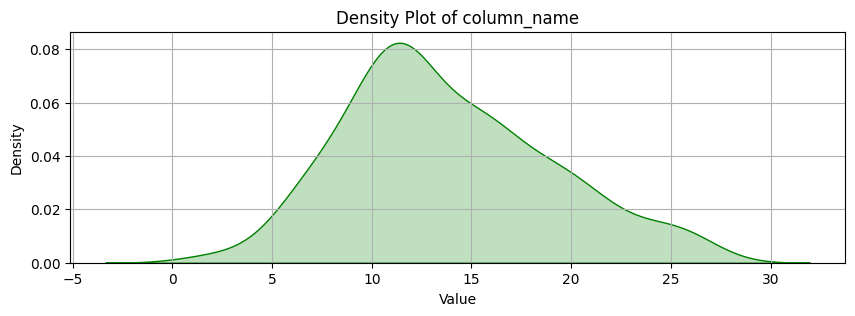

In [19]:
column_data = data['sales']

# Line plot
plt.figure(figsize=(10, 3))
plt.plot(column_data, color='blue')
plt.title('Line Plot of ' + 'column_name')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Density plot
plt.figure(figsize=(10, 3))
sns.kdeplot(column_data, shade=True, color='green')
plt.title('Density Plot of ' + 'column_name')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()


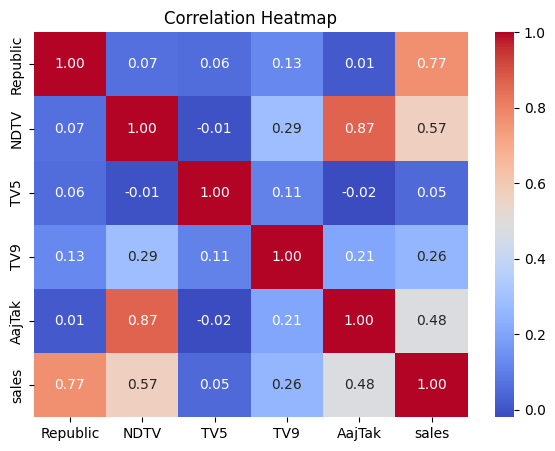

In [21]:
plt.figure(figsize=(7, 5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [26]:
data=data.drop(columns=["TV5"],axis=1)

In [28]:
data.shape

(305, 5)

In [33]:
X,y=data.drop(columns=["sales"],axis=1),data['sales']

In [38]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

Root Mean Squared Error: 1.8204337448153045


In [39]:
model.intercept_

2.9704039926493557

In [40]:
model.coef_

array([0.04350104, 0.16809985, 0.0017168 , 0.02320763])

In [46]:
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

mape=mean_absolute_percentage_error(y_test, y_pred)
print(f"mean_absolute_percentage_Error: {mape}")





Root Mean Squared Error: 1.8204337448153045
mean_absolute_percentage_Error: 0.19015288805437364


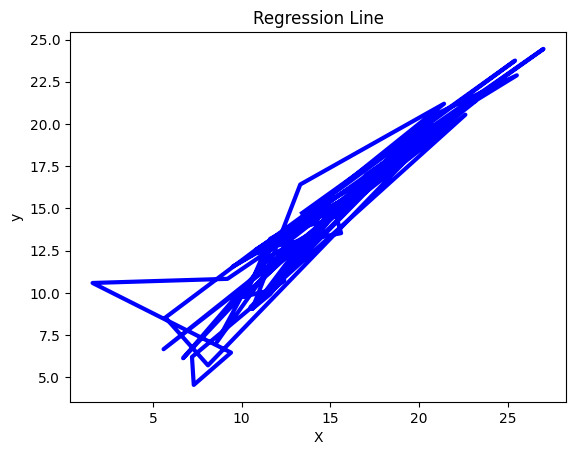

In [47]:
plt.plot(y_test, y_pred, color='blue', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression Line')
plt.show()

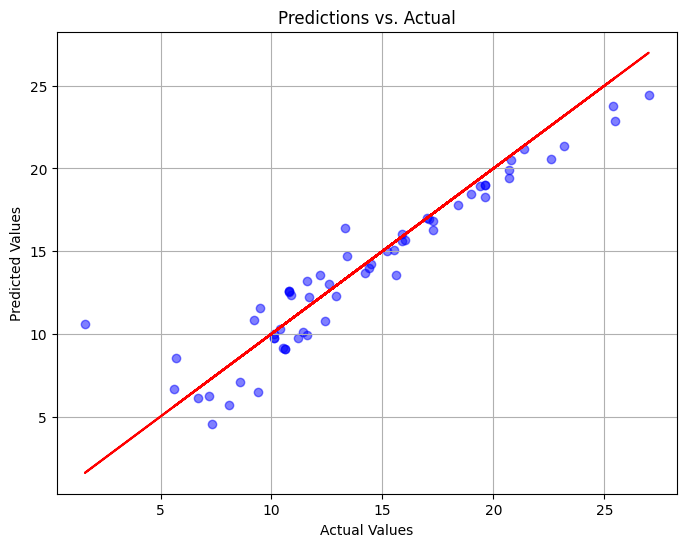

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Scatter plot
plt.plot(y_test,y_test, color='red')  # Line plot for perfect prediction
plt.title('Predictions vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()
